# Fuzzy Logic

Nel campo dell'insiemistica e della logica classica o booleana, particolare rilievo assume la Fuzzy Logic. Essa si distingue dalla logica classica perchè è possibile attribuire il grado di appartenenza di un dato ad uno o più insiemi, con valori compresi tra 0 e 1. La logica Fuzzy permette di realizzare insiemi con delle soglie sfocate.

Il flusso di informazioni nel modello Fuzzy richiede che le variabili in input passino attraverso tre processi 
 - _Fuzzification_ : gli input del sistema sono scomposti in uno o più Fuzzy set; in questo modo vengono prodotti una serie di ingressi per la Fuzzy.
 - _Fuzzy inference_ : in seguito alla fuzzification, vengono create un set di regole usate per processare gli input e produrre gli output per la Fuzzy.
 - _Defuzzification_ : in questo processo, l'output è stimato utilizzando gli output del set Fuzzy. L'output è il risultato della media dei pesi di tutte le regole Fuzzy nel modello logico Fuzzy.
 
 ![Fuzzy Model](./img/FuzzyModel.png)
    
In questo studio utilizzeremo il modello Fuzzy Mamdani, già utilizzato in altri lavori riguardanti l'identificazione delle oil spill.

## Preprocessing

Il dataset a nostra disposizione è composto da 31 features riguardanti sia gli aspetti morfologici, sia gli aspetti radiometrici. Il nostro scopo è quello di utilizzare le features usate in letteratura [1](#cite-doi:10.1080/01431161.2010.485147) per ottenere come risultato una classificazione ternaria, a differenza della classificazone binaria ottenuta nello studio di riferimento.
A questo punto avremo bisogno di altre due features: il FF(form factor) e il RBSDO(ratio between average backscattering and its standard deviation outside the area).

Prima di utilizzare le features, normalizzeremo tutto il nostro dataset utilizzando l'algoritmo Z-score, definito come:

\begin{equation}
\frac {Valore\_da\_normalizzare - Valore\_medio\_della\_feature}{Deviazione\_standard\_della\_feature}
\end{equation}

A questo punto, per la modellazione della logica Fuzzy, abbiamo bisogno dei seguenti valori per ogni singola classe:
- _Massimi e minimi_ - definiscono il range di appartenenza.
- _Media_ - definisce il grado di appartenenza.
Questi valori verranno calcolati per ogni singola feature appartenente ad una determinata classe.
Per modellare la Fuzzy verrà utilizzato il toolbox Fuzzy Logic Designer di **MATLAB**.

Per quanto riguarda le regole utilizzate, utilizzeremo solo le 3 regole principali:
 - If (**feature1 is feature1class2**) and (**feature2 is feature2class2**) and (**feature3 is feature3class2**) and (**feature4 is feature4class2**) and (**feature5 is feature5class2**) then (**output is CLASSE 2**);
 - If (**feature1 is feature1class3**) and (**feature2 is feature2class3**) and (**feature3 is feature3class3**) and (**feature4 is feature4class3**) and (**feature5 is feature5class3**) then (**output is CLASSE 3**);
 - If (**feature1 is feature1class4**) and (**feature2 is feature2class4**) and (**feature3 is feature3class4**) and (**feature4 is feature4class4**) and (**feature5 is feature5class4**) then (**output is CLASSE 4**);

## Test

Andremo ad implementare la logica Fuzzy seguendo queste tre fasi:
- _Fuzzification_ : questo processo è usato per determinare il grado di verità di ogni singola regola, dove le funzioni triangolari sono definite per ogni input.
- _Inference_ : durante il processo di inferenza, definiamo l'assegnamento degli output del set Fuzzy per ogni regola. Nel nostro caso utilizziamo la tecnica dell'inferenza min-max. La combinazione degli output Fuzzy sono costruiti dalla combinazione dei risultati di tutte le regole.
- _Defuzzification_ : l'output finale del nostro modello Fuzzy è la probabilità che un elemento appartenga ad una determinata classe. Quindi l'output deve essere defuzzificato.


### Istruzioni Main

 Per poter utilizzare questi script, la matrice dovrà essere ordinata in questo modo:

  - 1° Colonna - _Complexity_;
   ![Complexity](./img/Complexity.png)
  - 2° Colonna - _Form Factor (FF)_;
   ![Form Factor](./img/FF.png)
  - 3° Colonna - _Radio between average backscattering and its standard deviation outside the area(RBSDO)_;
   ![RBSDO](./img/RBSDO.png)
  - 4° Colonna - _GLCM2 TXT Stat Matrix Energy_;
   ![Energy](./img/Energy.png)
  - 5° Colonna - _TXT Stat Matrix Entropy_.
   ![Entropy](./img/Entropy.png)


Dopo aver ordinato la matrice, utilizzare l'algoritmo di normalizzazione zscore per normalizzare i dati.
A questo punto bisogna salvare la matrice degli input e avviare lo script.

Come file di esempio noi utilizzeremo la matrice Main5FeatureNorm.mat.

### Test 1

Per il primo test saranno utilizzate soltanto due classi: la CLASSE 2 e la CLASSE 4.

Come visto in letteratura, le 5 main features utilizzare oil spill sono:

  - 1° Colonna - _Complexity_;
  - 2° Colonna - _Form Factor (FF)_;
  - 3° Colonna - _Radio between average backscattering and its standard deviation outside the area(RBSDO)_;
  - 4° Colonna - _GLCM2 TXT Stat Matrix Energy_;
  - 5° Colonna - _TXT Stat Matrix Entropy_.
  
Utilizzando queste features i risultati da noi ottenuti risultano in contrasto con quelli dell'esperto. Infatti molti elementi vengono classificati di classe 3.

Con valori di appartenenza compresi tra:

- 2 e 2.6, considereremo l'elemento una oil spill di CLASSE 2;
- 2.6 e 3.4, considereremo l'elemento una oil spill di CLASSE 3;
- 3.4 e 4 considereremo l'elemento una oil spill di CLASSE 4.

In [10]:
% Caricamento matrice delle features
Features=importdata('./Dataset/Main5FeatureNorm.mat');
% Caricamento fuzzy logic
f=readfis('FuzzyTest1.fis');

% Facoltativo: Esclusione dei Tag 
A=double(Features(:,1:5));

% Risultato della fuzzy
Result=evalfis(A,f);

> In evalfis (line 75)


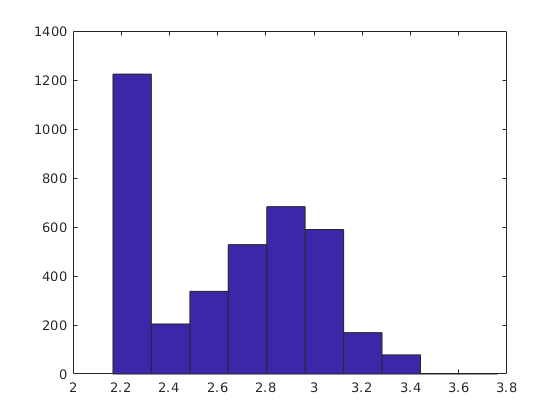

In [11]:
% Istogramma dei risultati
hist(Result);

### Test 2

Anche nel secondo test verranno utilizzate le 5 features caratterizzati. In letteratura queste features hanno prodotto buoni risultati (probabilità di appartenenza intorno al 80%) nel processo di distinzione tra oil spill e look-alike.

Modellando la Fuzzy nello stesso modo del test precedente, ma restituendo come output il grado di appartenenza (valore compreso tra 0 e 1) degli elementi a ciascuna classe, si evince che tutti gli elementi hanno gradi di appartenenza in un intervallo compreso tra 0.5 e 0.68.
In questo caso non è possibile confrontare direttamente i risultati ottenuti con la classificazione dell'esperto, ma è importante notare come la maggior parte degli elementi risulta di bassa appartenenza alla CLASSE 4 ed invece pochi elementi risultano di bassa appartenenza alla CLASSE 2, in concordo con quanto visto nella classificazione.

In [12]:
% Caricamento matrice delle features + Tag
Features=importdata('./Dataset/Main5FeatureNorm.mat');
% Caricamento fuzzy logic
f=readfis('FuzzyTest2.fis');

% Facoltativo: Esclusione dei Tag 
A=double(Features(:,1:5));

% Risultato della fuzzy
Result=evalfis(A,f);

> In evalfis (line 75)
Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is use

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 2.
Average of the range of this output variable is used as the output value.

Total area is zero in defuzzCentroid() for output 3.
Average of the range of this output variable is use

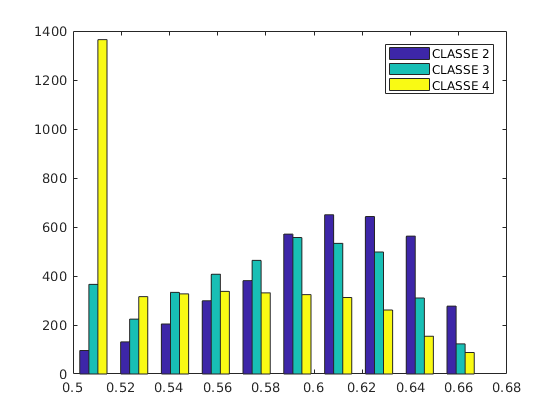

In [13]:
% Istogramma dei risultati
hist(Result);
legend('CLASSE 2','CLASSE 3', 'CLASSE 4');

### Conclusioni

Utilizzando il dataset a nostra disposizione abbiamo notato che i range di appartenenza delle varie classi e le loro medie, sono molto vicine tra loro.
Questa caratteristica ci ha portato ad avere dei pessimi risultati.
Il secondo test, nonostante utilizzi gli stessi input e le stesse regole del primo test, restituisce risultati migliori indicando il grado di appartenenza a ciascuna classe.
Purtroppo, anche utilizzando questo secondo metodo, non è stato possibile classificare le oil spill utilizzando la logica Fuzzy. 
Queste conclusioni vengono rafforzate anche dai risultati ottenuti dagli altri studi sull'identificazione delle oil spill mediante l'uso delle logiche Fuzzy. Infatti in letteratura, per indicare la probabilità con cui un elemento può essere considerato una oil spill oppure un look-alike, si utilizza un valore percentuale.

<!--bibtex

@article{doi:10.1080/01431161.2010.485147,
    author = { Peng   Liu  and  Chaofang   Zhao  and  Xiaofeng   Li  and  Mingxia   He  and  William   Pichel },
    title = {Identification of ocean oil spills in SAR imagery based on fuzzy logic algorithm},
    journal = {International Journal of Remote Sensing},
    volume = {31},
    number = {17-18},
    pages = {4819-4833},
    year  = {2010},
    publisher = {Taylor & Francis},
    doi = {10.1080/01431161.2010.485147},
    URL = { https://doi.org/10.1080/01431161.2010.485147},
    eprint = {https://doi.org/10.1080/01431161.2010.485147}
}

-->

# References

<a name="cite-doi:10.1080/01431161.2010.485147"/><sup>[^](#ref-1) </sup>Peng   Liu  and  Chaofang   Zhao  and  Xiaofeng   Li  and  Mingxia   He  and  William   Pichel . 2010. _Identification of ocean oil spills in SAR imagery based on fuzzy logic algorithm_. [URL](https://doi.org/10.1080/01431161.2010.485147)

